#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
x = dataset.drop(columns=['Survived'])
y = dataset['Survived']

In [4]:
dataset.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

#### Splitting the data into train and test data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [6]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [7]:
x_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


#### Imputing missing values using Random Sample Imputation

In [8]:
# imputing missing values in two columns, "Age_imputed" in both the training dataset ("x_train") and the test dataset ("x_test"), by replacing the missing values with a random sample from the non-missing values in the "Age" column of the training dataset.
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [9]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([ 3. , 36. , 26. , 22. , 48. , 35. , 33. , 40. , 28. , 37. , 14. ,
       29. , 30. ,  6. , 47. , 32. , 16. , 41. , 54. , 22. , 60. , 24. ,
       35. , 66. , 35. , 59. , 21. , 65. , 28. , 60. , 45. , 24. , 22. ,
       27. , 58. , 19. , 27. , 24. , 33. , 29. , 23. , 18. , 21. , 25. ,
       32. , 23.5,  4. , 12. , 27. , 51. , 18. , 18. ,  8. , 35. , 24. ,
       26. , 25. , 28. , 56. , 28. , 38. , 15. , 29. , 23. , 32. , 27. ,
        2. , 47. , 26. , 50. , 26. , 31. ,  3. , 28. , 21. , 52. , 30. ,
       24. , 40.5, 25. , 29. , 21. , 35. , 21. , 40. , 32.5, 40. ,  4. ,
       40. , 38. , 21. , 36. , 36. , 39. , 18. , 18. , 24. , 40. ,  7. ,
       40. , 14. , 24. , 32. , 36. , 31. , 33. , 22. , 16. , 38. , 50. ,
       32. , 30. , 14. , 29. , 16. , 29. , 19. , 30. , 19. ,  9. ,  1. ,
       36. , 21. , 17. , 24. , 30. , 21. , 24. , 18. , 18. , 62. , 27. ,
       31. , 30.5, 27. , 39. , 29. , 20. , 40. , 26. , 31. , 31. , 16. ,
        9. , 21. , 22. ,  1. , 30. ])

#### Checking changes after Imputation

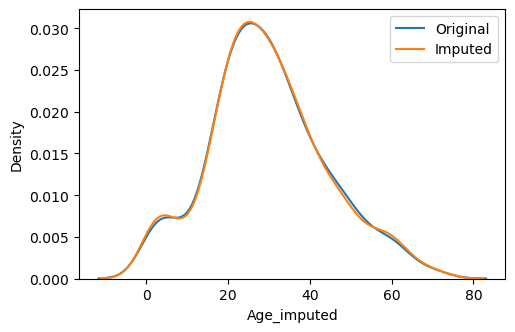

In [10]:
plt.figure(figsize = (5.5,3.5))
sns.distplot(x_train['Age'], label='Original',hist=False)
sns.distplot(x_train['Age_imputed'], label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [13]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  207.5445018455959


<AxesSubplot:>

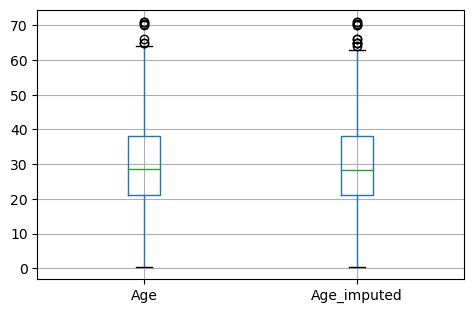

In [15]:
plt.figure(figsize = (5.5,3.5))
x_train[['Age', 'Age_imputed']].boxplot()